In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# linear regression
from sklearn import linear_model

In [4]:
Pov_data = pd.read_csv("Poverty_LifeExp.csv")
# quick view of columns and values
Pov_data.head()
# how many columns and rows in dataframe
Pov_data.shape
Pov_data.isnull().sum()
# are there duplicate values?
format(len(Pov_data[Pov_data.duplicated()]))
# standard statistical measures
Pov_data.describe(percentiles = [.25, .5, .75, .90 ,.95, .99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


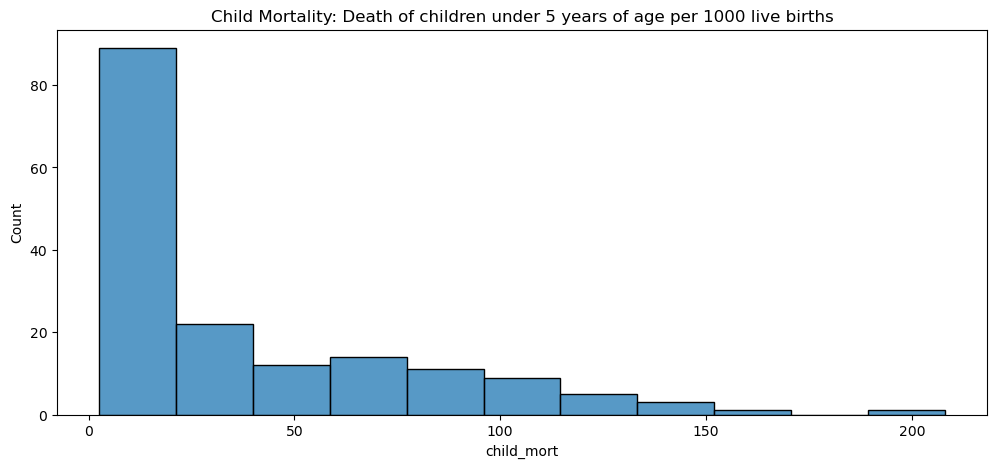

In [6]:
plt.figure(figsize=(12,5))
plt.title("Child Mortality: Death of children under 5 years of age per 1000 live births")
ax = sns.histplot(Pov_data["child_mort"])  #纵坐标表示国家总数，countries

<AxesSubplot:>

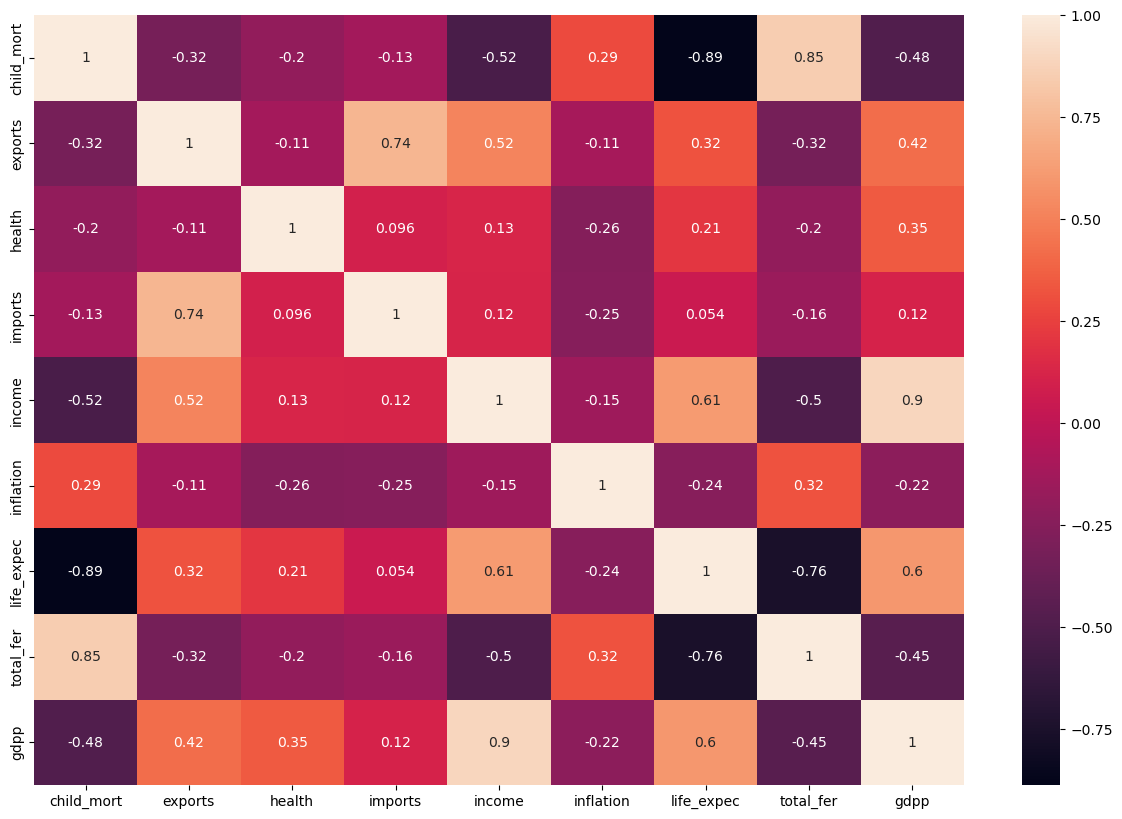

In [12]:
# pearson
plt.figure(figsize=(15,10))
sns.heatmap(Pov_data.corr(method='pearson', min_periods=1),annot=True)


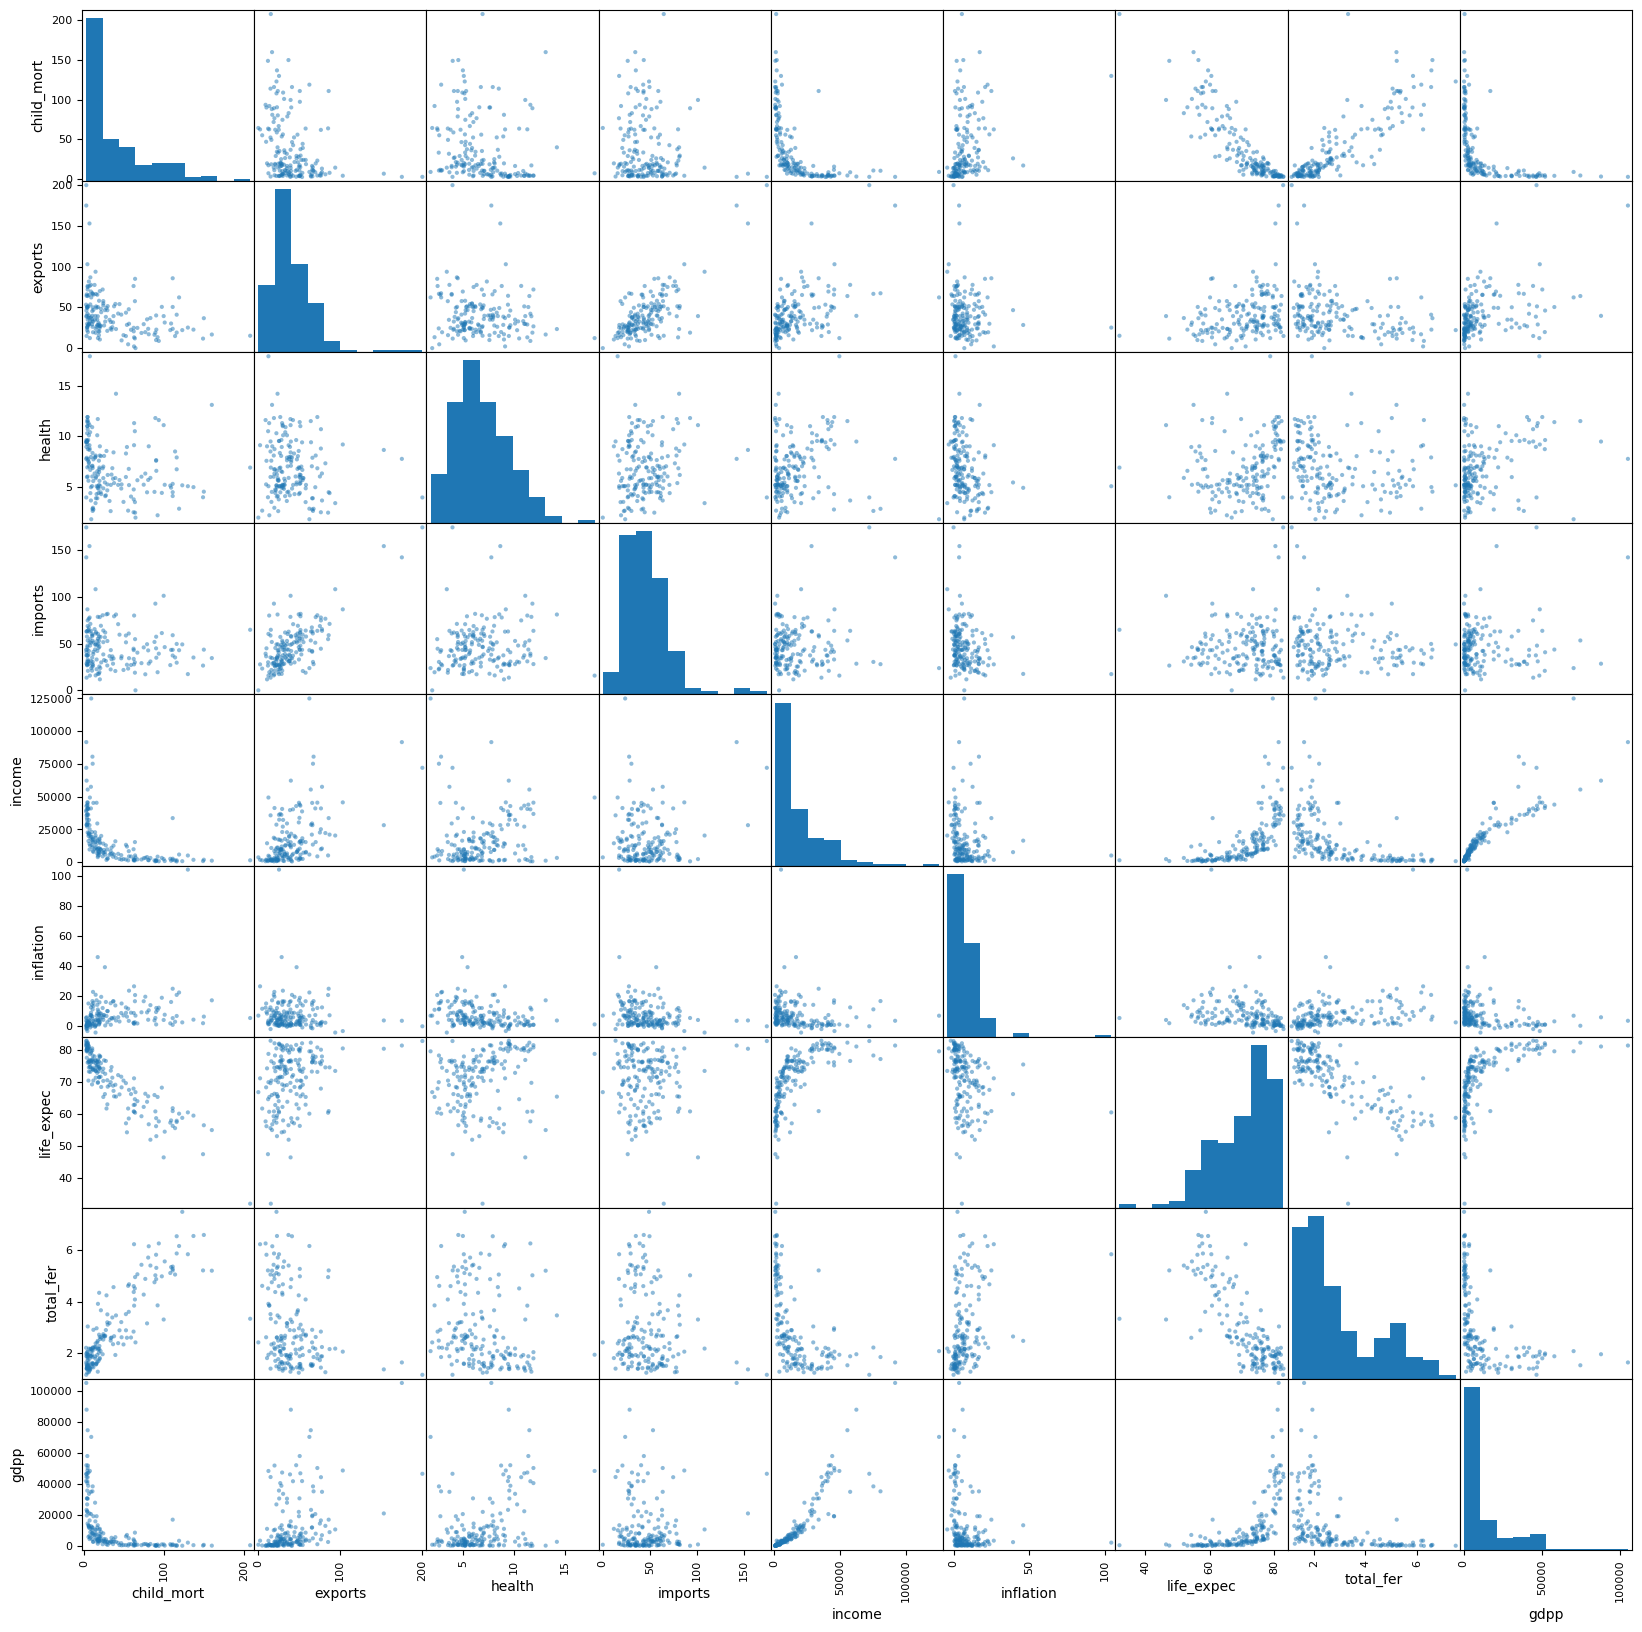

In [17]:
Pov_data.corr()
pd.plotting.scatter_matrix(Pov_data,figsize=[20,20])
plt.show()

In [14]:
# TO DO 1: 
# if the child_mort increase, the total_far will increase as well, 
        # they are positive associational relationship, and strong correlative(0.85).
# if income increase, the gdpp will increase, 
        # they are positive associational relationship, and strong correlative(0.9).
# there is a negative correlative relation beween income and child_mort, the degree of linear association is -0.52.
# the relationship between exports and inflation is negative and weak(-0.11)

In [ ]:
# 1.3 Scaling

In [21]:
Pov_data_Drop = Pov_data.drop(['country'], axis =1) 
Pov_data_Drop.head()

# eliminate the column. Save the new dataset as Pov_data_Drop 
# so you have a backup of  original dataset just in case!

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [33]:
# Columns argument ==> we'll use later to create a new datafarame with the rescaled data
columns = Pov_data_Drop.columns
scaler = MinMaxScaler() # fot the rescaling
# 'fit' function is to find the x_min and the x_man
#'transform' function applies formula to all elements of data

normalised_dataset = scaler.fit_transform(Pov_data_Drop)
normalised_dataset

My_normalised_df = pd.DataFrame(data = normalised_dataset, columns = columns )
My_normalised_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242
...,...,...,...,...,...,...,...,...,...
162,0.129503,0.232582,0.213797,0.302609,0.018820,0.063118,0.609467,0.370662,0.026143
163,0.070594,0.142032,0.192666,0.100809,0.127750,0.463081,0.854043,0.208202,0.126650
164,0.100779,0.359651,0.312617,0.460715,0.031200,0.150725,0.808679,0.126183,0.010299
165,0.261441,0.149536,0.209447,0.197397,0.031120,0.257000,0.698225,0.555205,0.010299


In [34]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

In [38]:
print(scaler.fit(Pov_data_Drop))

StandardScaler()


In [39]:
print(scaler.mean_)

[3.82700599e+01 4.11089760e+01 6.81568862e+00 4.68902150e+01
 1.71446886e+04 7.78183234e+00 7.05556886e+01 2.94796407e+00
 1.29641557e+04]


In [40]:
print(scaler.transform(Pov_data_Drop))

[[ 1.29153238 -1.13827979  0.27908825 ... -1.61909203  1.90288227
  -0.67917961]
 [-0.5389489  -0.47965843 -0.09701618 ...  0.64786643 -0.85997281
  -0.48562324]
 [-0.27283273 -0.09912164 -0.96607302 ...  0.67042323 -0.0384044
  -0.46537561]
 ...
 [-0.37231541  1.13030491  0.0088773  ...  0.28695762 -0.66120626
  -0.63775406]
 [ 0.44841668 -0.40647827 -0.59727159 ... -0.34463279  1.14094382
  -0.63775406]
 [ 1.11495062 -0.15034774 -0.33801514 ... -2.09278484  1.6246091
  -0.62954556]]


In [ ]:
# 2 Linear Regression Model

In [51]:
# Perform step 1:3 first:

# 1) Import data and save it as ‘mpi_ds’
# 2) Observe the features
# 3) Drop 'ISO','Headcount Ratio Urban','Intensity of Deprivation
    # Urban','Headcount Ratio Rural','Intensity of Deprivation Rural' columns
    # and save the new dataset as ‘my_mpi_ds’

mpi_ds =  pd.read_csv ('MPI_Dataset.csv') 

In [52]:
mpi_ds

,ISO,Country,MPI Urban,Headcount Ratio Urban,Intensity of Deprivation Urban,MPI Rural,Headcount Ratio Rural,Intensity of Deprivation Rural
0,KAZ,Kazakhstan,0.000,0.0,33.3,0.000,0.09,33.3
1,SRB,Serbia,0.000,0.1,41.4,0.002,0.50,40.3
2,KGZ,Kyrgyzstan,0.000,0.1,40.2,0.003,0.70,37.1
3,TUN,Tunisia,0.000,0.1,35.6,0.012,3.18,38.7
4,ARM,Armenia,0.001,0.2,33.3,0.001,0.39,36.9
...,...,...,...,...,...,...,...,...
97,CAF,Central African Republic,0.289,58.2,49.7,0.519,89.79,57.8
98,LBR,Liberia,0.290,60.5,48.0,0.481,84.86,56.6
99,SOM,Somalia,0.293,55.9,52.4,0.651,96.92,67.2
100,TCD,Chad,0.351,64.8,54.1,0.609,93.41,65.2


In [64]:
my_mpi_ds = mpi_ds.drop(['ISO','Headcount Ratio Urban','Intensity of Deprivation Urban',
                         'Headcount Ratio Rural','Intensity of Deprivation Rural'],axis =1)

In [65]:
#Rename the column heading as below
my_mpi_ds.rename(
columns = {'Country':'country','MPI Urban':'mpi_urban','MPI Rural':'mpi_rural'},inplace = True)

In [68]:
my_mpi_ds.head(3)

,country,mpi_urban,mpi_rural
0,Kazakhstan,0.0,0.000
1,Serbia,0.0,0.002
2,Kyrgyzstan,0.0,0.003


In [69]:
combined = pd.merge(Pov_data,my_mpi_ds,on='country',how='inner')
combined.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,mpi_urban,mpi_rural
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0.132,0.347
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.003,0.007
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0.003,0.011
3,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,0.001,0.001
4,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.80,69.1,1.92,5840,0.009,0.035


In [72]:
# TO DO 2
# Perform correlation analysis on your new dataset (‘combined’). Provide the correlation
# matrix output and explain your finding
#there is a negative correlative relation between child_mort and life_expec.
#the correlation R between mpi_urban and mpi_rural is close to 1. 

# Is there any multicollinearity within the features?
# yes, the total fertility is increasing mpi_urban and mpi_rural is increasing

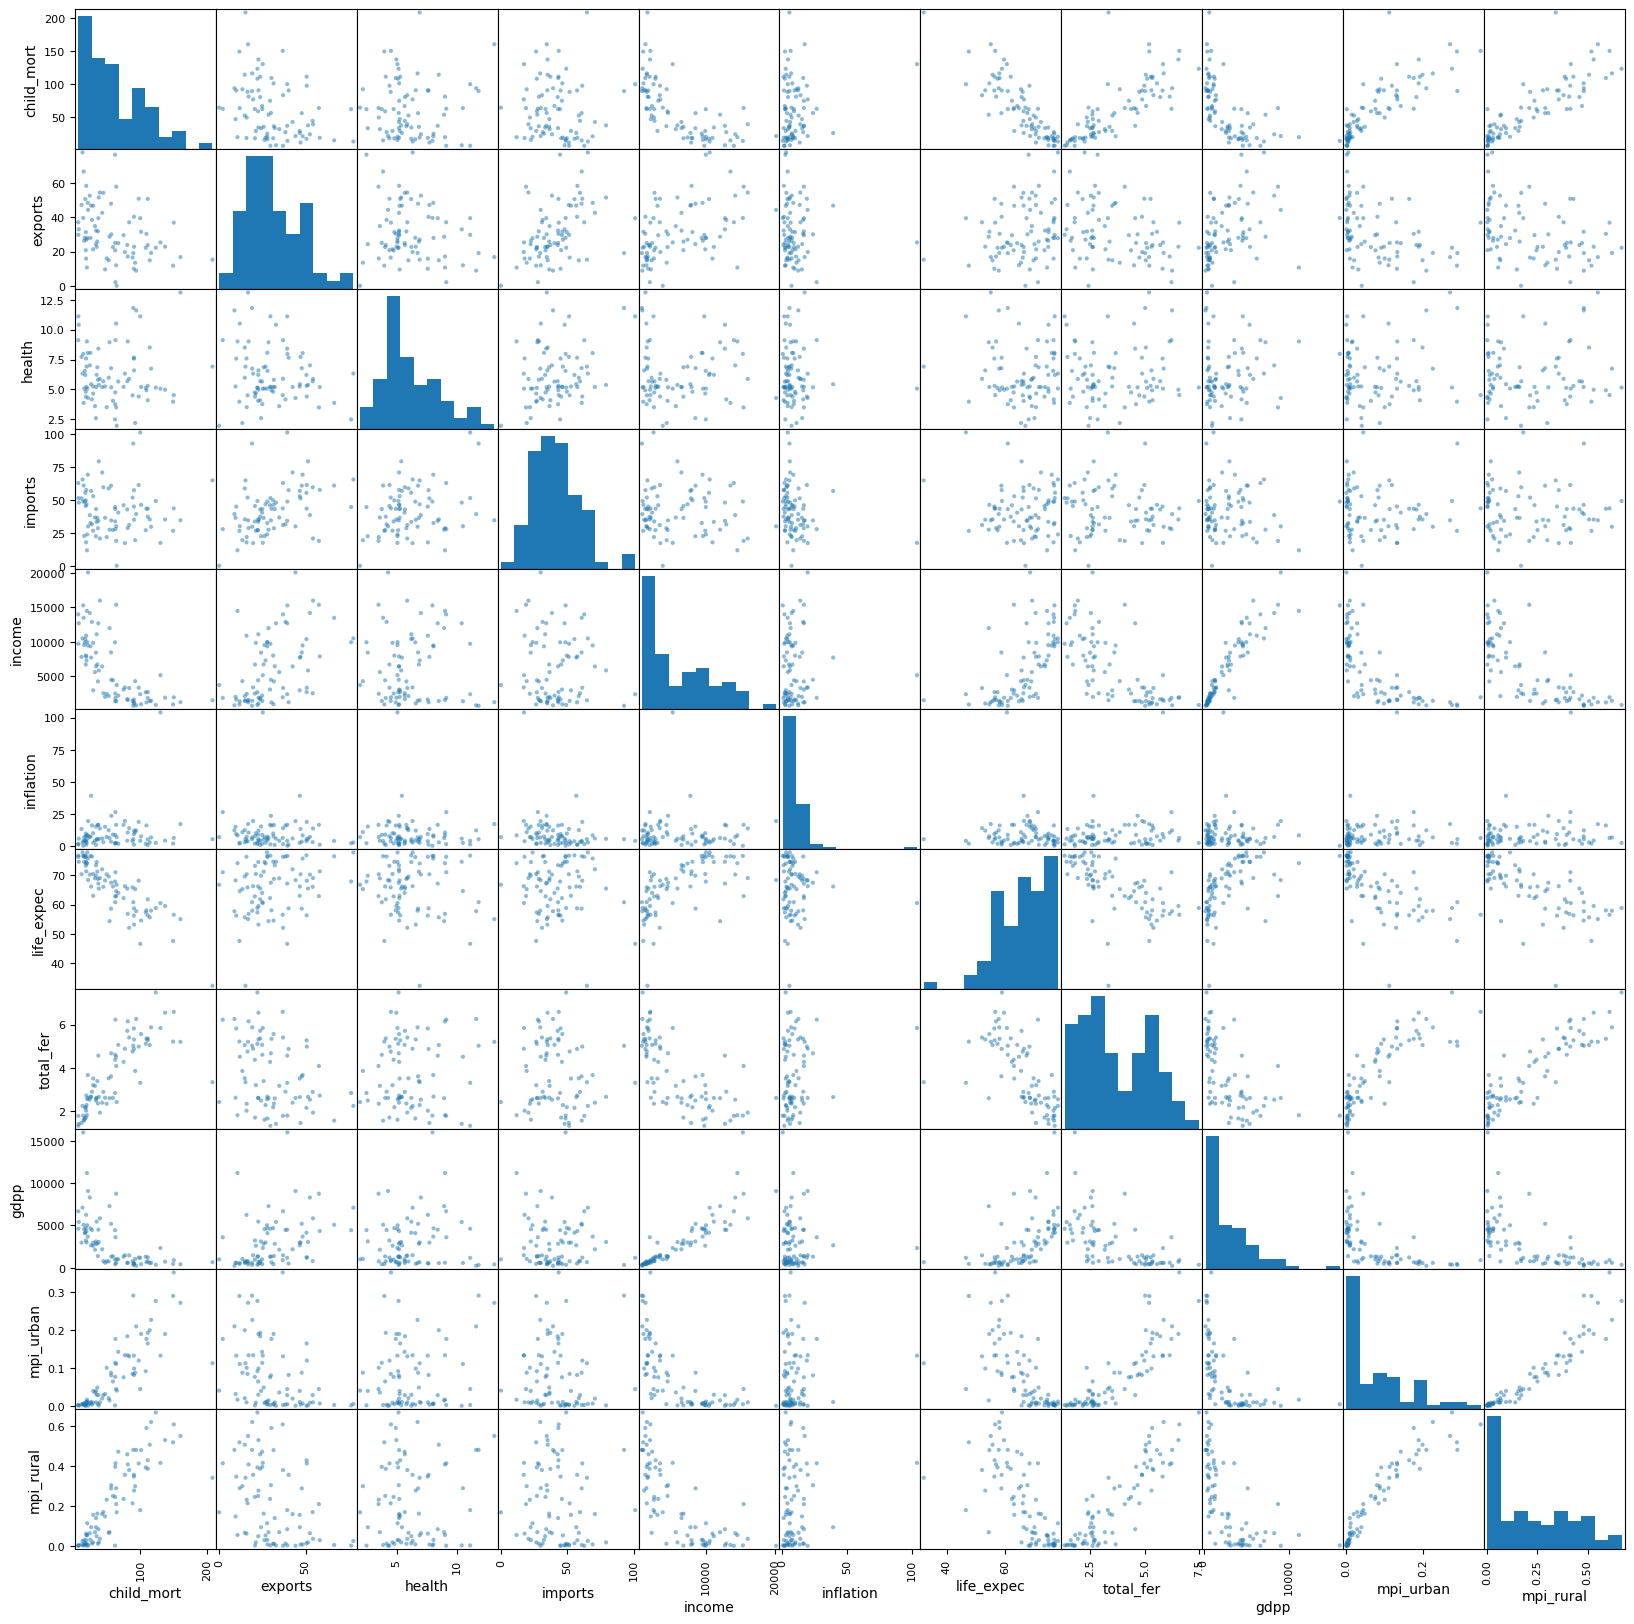

In [71]:
Pov_data.corr()
pd.plotting.scatter_matrix(combined,figsize=[20,20])
plt.show()


In [74]:
reg = linear_model.LinearRegression()#linear regression class object
import statsmodels.api as sm
from statsmodels.formula.api import ols # libraries for plotting of residual plots

                            OLS Regression Results                            
Dep. Variable:              mpi_urban   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     163.5
Date:                Tue, 28 Mar 2023   Prob (F-statistic):           9.91e-21
Time:                        15:01:06   Log-Likelihood:                 127.06
No. Observations:                  79   AIC:                            -250.1
Df Residuals:                      77   BIC:                            -245.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0230      0.010     -2.388      0.0

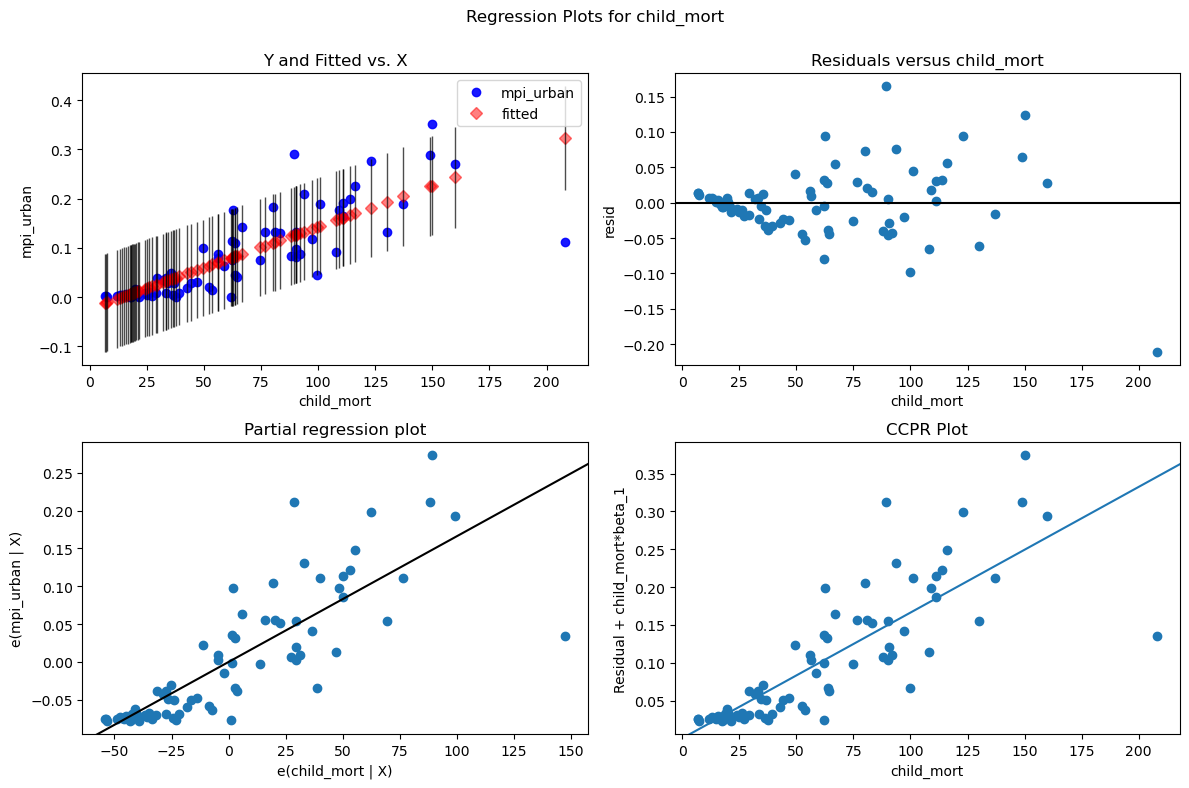

In [76]:
#fit simple linear regression model
model = ols('mpi_urban ~ child_mort', data=combined).fit()
#print model summary
print(model.summary())
#adjust figure size
fig = plt.figure(figsize=(12,8))
#generate regression plots
fig = sm.graphics.plot_regress_exog(model, 'child_mort', fig=fig)

In [77]:
# To Do 3: Create the model for remaining predictors and provide the results only. Your result report
# must be well formatted and readable.

                            OLS Regression Results                            
Dep. Variable:             life_expec   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     224.8
Date:                Tue, 28 Mar 2023   Prob (F-statistic):           1.52e-24
Time:                        15:02:43   Log-Likelihood:                -228.71
No. Observations:                  79   AIC:                             461.4
Df Residuals:                      77   BIC:                             466.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     76.4776      0.871     87.818      0.0

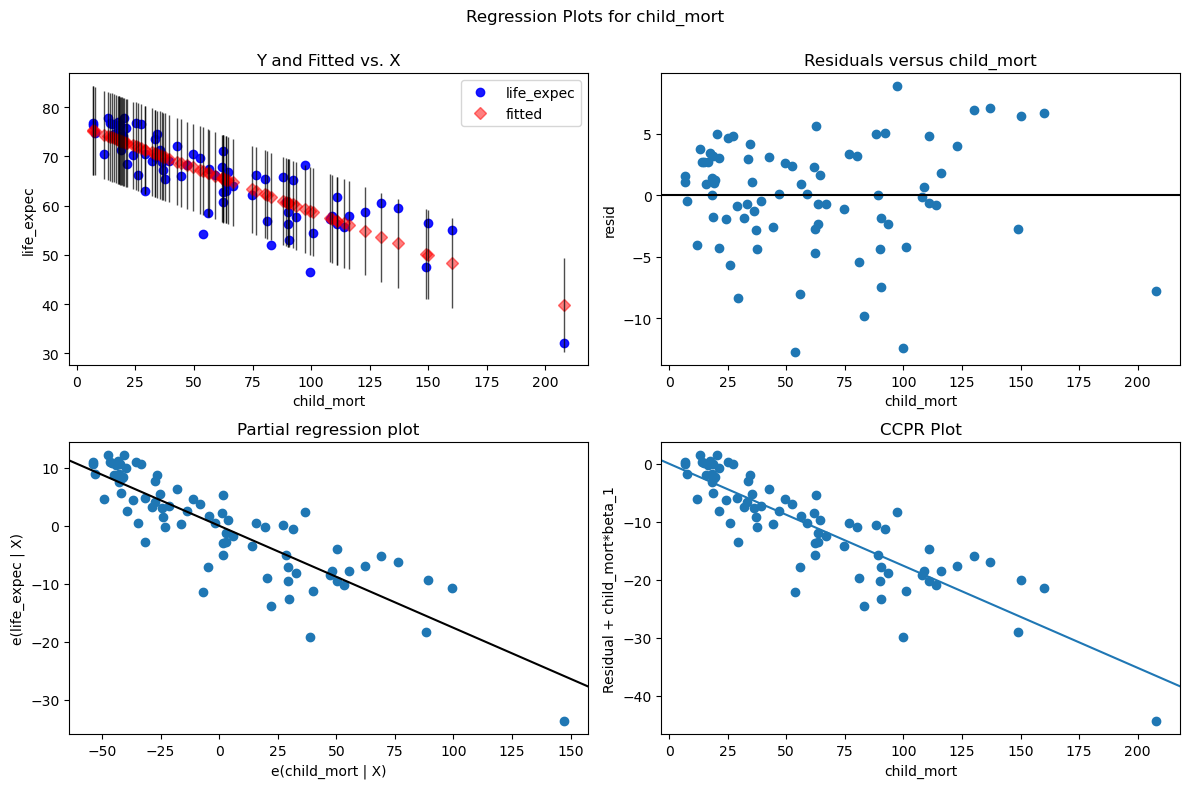

In [78]:
#fit simple linear regression model
model = ols('life_expec ~ child_mort', data=combined).fit()
#print model summary
print(model.summary())
#adjust figure size
fig = plt.figure(figsize=(12,8))
#generate regression plots
fig = sm.graphics.plot_regress_exog(model, 'child_mort', fig=fig)